<a href="https://colab.research.google.com/github/mm002a/JupyterNotebooks-V0.0/blob/main/DeclineCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install pytexit

In [22]:
from pytexit import py2tex

In [23]:
py2tex('Tot_prod = (1-pow(1+b*d_init*T,(b/(1-b))))*q_init/(d_init*(1-b))')

<IPython.core.display.Latex object>

$$Tot_{prod}=\frac{\left(1-\left(1+b d_{init} T\right)^{\frac{b}{1-b}}\right) q_{init}}{d_{init} \left(1-b\right)}$$


'$$Tot_{prod}=\\frac{\\left(1-\\left(1+b d_{init} T\\right)^{\\frac{b}{1-b}}\\right) q_{init}}{d_{init} \\left(1-b\\right)}$$'

In [18]:
#Exponential decline
import math
def Tot_prod_exp (q_init=1,d_init=0.1,b=0,T=10):
  """
  Compute the total production for a well with an exponential decline curve
  Tot_prod_exp (q_init=1,d_init=0.1,b=0,T=10)
  q_init: the initial production, d_init: the initial decline rate, 
  b: dummy variable, T: the time period
  """
  print("Exponential decline:")
  Tot_prod = -q_init*(1-pow((1-d_init),T))/math.log(1-d_init)
  print("q_init: ",q_init,"d_init: ",d_init," b: ",b," Time: ",T)
  return Tot_prod
def Tot_prod_hyper (q_init=1,d_init=0.1,b=0.5,T=10):
  """
  Compute the total production for a well with a hyperbolic decline curve
  Tot_prod_exp (q_init=1,d_init=0.1,b=0.5,T=10)
  q_init: the initial production, d_init: the initial decline rate, 
  b: model parameter (0->exponential, 1->harmonic), T: the time period
  """
  print("Hyperbolic decline:")
  print("1+bd")
  Tot_prod = (1-pow(1+b*d_init*T,(b/(1-b))))*q_init/(d_init*(1-b))
  print("q_init: ",q_init,"d_init: ",d_init," b: ",b," T: ",T)
  return Tot_prod
print("Test of log10: ",math.log10(10)," e: ",math.e," ln: ",math.log(math.e))
print("Tot Prod(exponential decline): ",Tot_prod_exp(T=12))
print("Tot Prod(hyperbolic decline): ",Tot_prod_hyper(T=12))

Test of log10:  1.0  e:  2.718281828459045  ln:  1.0
Exponential decline:
q_init:  1 d_init:  0.1  b:  0  Time:  12
Tot Prod(exponential decline):  6.810620269261164
Hyperbolic decline:
q_init:  1 d_init:  0.1  b:  0.5  T:  12
Tot Prod(hyperbolic decline):  -12.000000000000002


q:  [904.84, 818.73, 740.82, 670.32, 606.53, 548.81, 496.59, 449.33, 406.57, 367.88, 332.87, 301.19, 272.53, 246.6, 223.13, 201.9, 182.68, 165.3, 149.57, 135.34, 122.46, 110.8, 100.26, 90.72]


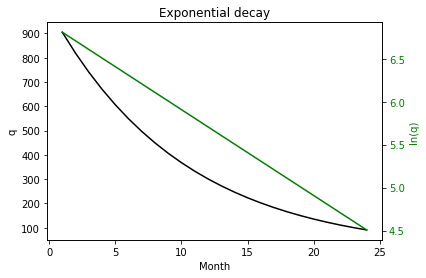

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#Exponential decay Table 8-1 from https://faculty.ksu.edu.sa/sites/default/files/Production Decline Analysis.pdf
q = [904.84, 818.73, 740.82, 670.32, 606.53, 548.81, 496.59, 449.33, 406.57, 367.88, 332.87, 301.19, 272.53, 246.60, 223.13,
     201.90, 182.68, 165.30, 149.57, 135.34, 122.46, 110.80, 100.26, 90.72]
print("q: ",q)
x = list(range(1,25))
#https://pythonguides.com/matplotlib-two-y-axes/
fig, ax1 = plt.subplots() 

ax1.set_title('Exponential decay')  
ax1.set_xlabel('Month') 
ax1.set_ylabel('q', color = 'black') 
plot_1 = ax1.plot(x, q, color = 'black') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('ln(q)', color = 'green') 
plot_2 = ax2.plot(x, np.log(q), color = 'green') 
ax2.tick_params(axis ='y', labelcolor = 'green') 

# Show plot

plt.show()
#


[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8]
[-0.16684607 -0.11135857 -0.08064516 -0.06190476 -0.04914005 -0.04159132
 -0.03585398 -0.02982849 -0.02758621 -0.02321083 -0.02183406 -0.01839715
 -0.01750164 -0.01569859 -0.01406752 -0.01354489 -0.01215862 -0.01177643
 -0.01056338 -0.00942103 -0.00917431 -0.0089562  -0.00796686 -0.00779727
 -0.00688179 -0.00749738 -0.00590319 -0.00651985 -0.00571021 -0.00562232
 -0.00485033 -0.00546001 -0.00472207 -0.004662   -0.00394945 -0.00454782
 -0.00386051]


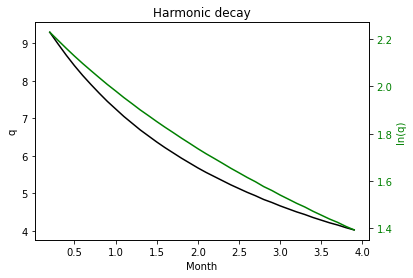

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from array import array
#Harmonic decay Table 8-2 from https://faculty.ksu.edu.sa/sites/default/files/Production Decline Analysis.pdf
#Just typing data!q = [9.29, 0.30, 8.98, 0.40, 8.68, 0.50, 8.40, 0.60, 8.14, 0.70, 7.90, 0.80, 7.67, 0.90, 7.45, 1.00, 7.25, 1.10, 7.05, 1.20, 6.87, 1.30, 6.69, 1.40, 6.53, 
#     1.50, 6.37, 1.60, 6.22, 1.70, 6.08, 1.80, 5.94, 1.90, 5.81, 2.00, 5.68,
#     2.10, 5.56, 2.20, 5.45, 2.30, 5.34, 2.40, 5.23, 2.50, 5.13, 2.60, 5.03, 2.70, 4.94, 2.80, 4.84]
#print("q: ",q)
#q1 = q[0:54:2]
#print("q1: ",q1)
#q2 =[4.76, 4.67, 4.59, 4.51, 4.44, 4.36, 4.29, 4.22, 4.16, 4.09, 4.03]
#qall = np.append(q1,q2)
#print("qall: ",qall)
#
qall = [9.29, 8.98, 8.68, 8.4, 8.14, 7.9, 7.67, 7.45, 7.25, 7.05, 6.87, 6.69, 6.53, 6.37, 6.22, 6.08, 5.94, 5.81, 5.68,
        5.56, 5.45, 5.34, 5.23, 5.13, 5.03, 4.94, 4.84, 4.76, 4.67, 4.59, 4.51, 4.44, 4.36, 4.29, 4.22, 4.16, 4.09, 4.03]
x = np.arange(0.2, 4.0, 0.1)
#print("x: ",x)
#https://pythonguides.com/matplotlib-two-y-axes/
fig, ax1 = plt.subplots() 

ax1.set_title('Harmonic decay')  
ax1.set_xlabel('Month') 
ax1.set_ylabel('q', color = 'black') 
plot_1 = ax1.plot(x, qall, color = 'black') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('ln(q)', color = 'green') 
#
xt = np.arange(0.2, 3.9, 0.1)
print(xt)
Dq = np.zeros(37)
for i in range(37):
    Dq[i] = (qall[i+1]-qall[i])/(qall[i]*xt[i])
print(Dq)
#
plot_2 = ax2.plot(x, np.log(qall), color = 'green') 
ax2.tick_params(axis ='y', labelcolor = 'green') 

# Show plot

plt.show()
#
